# Final Project Template

For your final project, you are required to create an object detection and classification pipeline using the provided datasets. You will train a classification model using the included images and then apply this model for inference on the provided still image.

Here are the detailed steps for your project:

1) Begin by implementing one of the classic object detection techniques we have covered, such as HSV tracking, blob detection, edge detection. You can choose to employ one technique or combine multiple ones. The goal is to create bounding boxes around objects within the scene. To facilitate the classification step, ensure that all bounding boxes are in the form of rectangles.&nbsp;

2) Utilize the provided images to train a Convolutional Neural Network (CNN) model for the classification of the objects within the bounding boxes. You can use Google Colab to train larger models that require a GPU. We will discuss the specifics of this process in class.&nbsp;

3) Finally, render the final still image with bounding boxes and text that display the classification label of the object contained within each box.

We will build and discuss small examples of each step in this project to help you successfully complete it.

Submit a notebook with your all your model training and object detection steps.&nbsp; Also include your model in ".keras" or ".tf" format.

The datasets (choose one, you don't have to do both!):

1) Car/Truck/Airplane

2) Dog/Bird/Deer



Notes:

1) You are creating a small model which can classify small images.&nbsp; &nbsp;Follow the basic structure and format we discussed in class.&nbsp;

2) Your models will not be perfect, averaging around 75% accuracy,&nbsp; and mislabeling will happen.&nbsp; Concentrate on your object detection pipeline to create bounding boxes and then passing the image data to your model for classification.&nbsp;

3) Make sure your bounding boxes are sized correctly for your model.

4) If you normalize your image data (0-1) then you need to normalize the images from your bounding boxes before you pass them to your model.

5) Your models will be trained with labels as integer values and will need to be mapped to your class names.&nbsp; "Deer", "Dog" ... etc.&nbsp;&nbsp;

In [295]:

import tensorflow as tf

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  1


## Model Training

In [296]:
# Code for your model goes here
# i manually unzipped files into train folder

#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [297]:
# Load the images from the directory
def load_images_from_folder(train):
    images = []
    for filename in os.listdir(train):
        img = cv2.imread(os.path.join(train, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

# The folder paths your images are located in.  You will change these for your directories.
folder_paths = ['train/dog', 'train/bird', 'train/deer']


# The class names/labels of your images.
class_labels = {'dog': 0, 'bird': 1, 'deer': 2}

# The lists to store your images and labels in.
x_train = []
y_train = []

# Load the images and labels into the lists.
for folder_path in folder_paths:
    class_name = os.path.basename(folder_path)
    class_id = class_labels[class_name]
    images = load_images_from_folder(folder_path)

    # Extend the lists to add the images and labels from the loaded folder.
    x_train.extend(images)
    y_train.extend([class_id] * len(images))

# Convert the loaded lists into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [298]:
# Print the shape of the training data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Print the first 10 labels
print(f"Sample labels: {y_train[:10]}")

x_train shape: (15000, 64, 64, 3)
y_train shape: (15000,)
Sample labels: [0 0 0 0 0 0 0 0 0 0]


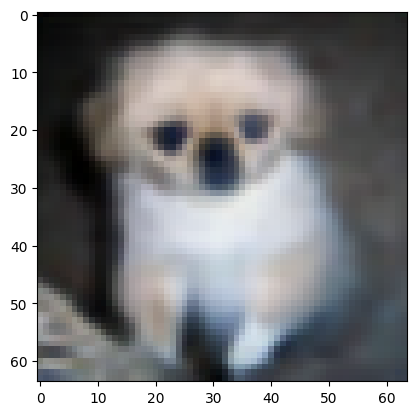

In [299]:
plt.imshow(x_train[0])

In [300]:
# Check the corresponding label for the image above. Change the index to view different labels.
#prints out 0 which means dog. we're good.
print(y_train[0])

0


In [301]:
print(x_train[0])

[[[  7   4   3]
  [  2   2   4]
  [  8   6   7]
  ...
  [ 38  37  38]
  [ 32  36  35]
  [ 30  38  34]]

 [[  3   8   9]
  [ 10  11   9]
  [ 12  14   9]
  ...
  [ 39  41  40]
  [ 35  36  36]
  [ 34  33  33]]

 [[  4   7   5]
  [  9  10   9]
  [  7  10   9]
  ...
  [ 40  41  41]
  [ 38  40  40]
  [ 37  37  38]]

 ...

 [[136 140 141]
  [144 149 150]
  [152 155 155]
  ...
  [ 63  69  77]
  [ 60  68  77]
  [ 59  66  74]]

 [[ 84  91 106]
  [ 79  89 108]
  [ 86  96 116]
  ...
  [ 60  67  77]
  [ 54  63  78]
  [ 55  64  75]]

 [[ 77  88 108]
  [ 70  81 102]
  [ 76  86 105]
  ...
  [ 61  68  78]
  [ 56  64  75]
  [ 57  64  77]]]


In [302]:
x_train = x_train.astype('float32') / 255.0

In [303]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


2023-12-10 14:32:02.310993: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 14:32:02.311210: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 14:32:02.311363: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [304]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
import keras

# Define the checkpoint callback
checkpoint_path = "best_model.tf"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = LearningRateScheduler(scheduler)

# Define the VGG16 architecture
model = keras.Sequential([

    # Data augmentation layers
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(64,64,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),

    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=(2,2)),

    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Fine tune the sgd optimizer
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=200, batch_size=64, shuffle=True, validation_split=0.2, callbacks=[checkpoint, lr_schedule])


Epoch 1/200
187/188 [============================>.] - ETA: 0s - loss: 1.4852 - accuracy: 0.4634
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 17s 82ms/step - loss: 1.4843 - accuracy: 0.4633 - val_loss: 2.8485 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/200
187/188 [============================>.] - ETA: 0s - loss: 1.0191 - accuracy: 0.4940
Epoch 2: val_accuracy did not improve from 0.00000
188/188 [==============================] - 13s 67ms/step - loss: 1.0188 - accuracy: 0.4940 - val_loss: 1.9924 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/200
187/188 [============================>.] - ETA: 0s - loss: 0.9989 - accuracy: 0.5039
Epoch 3: val_accuracy did not improve from 0.00000
188/188 [==============================] - 13s 67ms/step - loss: 0.9992 - accuracy: 0.5034 - val_loss: 1.5392 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/200
187/188 [============================>.] - ETA: 0s - loss: 0.9798 - accuracy: 0.5209
Epoch 4: val_accuracy did not improve from 0.00000
188/188 [==============================] - 13s 67ms/step - loss: 0.9799 - accuracy: 0.5205 - val_loss: 1.5

INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 15s 82ms/step - loss: 0.8661 - accuracy: 0.6179 - val_loss: 1.2400 - val_accuracy: 0.0023 - lr: 0.0100
Epoch 13/200
187/188 [============================>.] - ETA: 0s - loss: 0.8559 - accuracy: 0.6151
Epoch 13: val_accuracy did not improve from 0.00233
188/188 [==============================] - 13s 68ms/step - loss: 0.8558 - accuracy: 0.6155 - val_loss: 1.4559 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 14/200
187/188 [============================>.] - ETA: 0s - loss: 0.8399 - accuracy: 0.6323
Epoch 14: val_accuracy did not improve from 0.00233
188/188 [==============================] - 13s 68ms/step - loss: 0.8403 - accuracy: 0.6321 - val_loss: 1.4459 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 15/200
187/188 [============================>.] - ETA: 0s - loss: 0.8246 - accuracy: 0.6413
Epoch 15: val_accuracy did not improve from 0.00233
188/188 [==============================] - 13s 68ms/step - loss: 0.8247 - accuracy: 0.6411 - val_loss: 1

INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 16s 84ms/step - loss: 0.8147 - accuracy: 0.6489 - val_loss: 1.1993 - val_accuracy: 0.0377 - lr: 0.0100
Epoch 17/200
187/188 [============================>.] - ETA: 0s - loss: 0.7918 - accuracy: 0.6609
Epoch 17: val_accuracy improved from 0.03767 to 0.20067, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 15s 81ms/step - loss: 0.7924 - accuracy: 0.6607 - val_loss: 1.3287 - val_accuracy: 0.2007 - lr: 0.0100
Epoch 18/200
187/188 [============================>.] - ETA: 0s - loss: 0.7723 - accuracy: 0.6771
Epoch 18: val_accuracy did not improve from 0.20067
188/188 [==============================] - 13s 68ms/step - loss: 0.7725 - accuracy: 0.6769 - val_loss: 1.2702 - val_accuracy: 0.0520 - lr: 0.0100
Epoch 19/200
187/188 [============================>.] - ETA: 0s - loss: 0.7554 - accuracy: 0.6843
Epoch 19: val_accuracy did not improve from 0.20067
188/188 [==============================] - 13s 68ms/step - loss: 0.7555 - accuracy: 0.6842 - val_loss: 2.0795 - val_accuracy: 0.0233 - lr: 0.0100
Epoch 20/200
187/188 [============================>.] - ETA: 0s - loss: 0.7479 - accuracy: 0.6881
Epoch 20: val_accuracy did not improve from 0.20067
188/188 [==============================] - 13s 68ms/step - loss: 0.7472 - accuracy: 0.6885 - val_loss: 1.7996 - 

INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 15s 82ms/step - loss: 0.6993 - accuracy: 0.7093 - val_loss: 1.1129 - val_accuracy: 0.2637 - lr: 0.0100
Epoch 24/200
187/188 [============================>.] - ETA: 0s - loss: 0.6759 - accuracy: 0.7244
Epoch 24: val_accuracy improved from 0.26367 to 0.33100, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 15s 81ms/step - loss: 0.6760 - accuracy: 0.7245 - val_loss: 1.1225 - val_accuracy: 0.3310 - lr: 0.0100
Epoch 25/200
187/188 [============================>.] - ETA: 0s - loss: 0.6732 - accuracy: 0.7298
Epoch 25: val_accuracy did not improve from 0.33100
188/188 [==============================] - 13s 68ms/step - loss: 0.6732 - accuracy: 0.7300 - val_loss: 1.2446 - val_accuracy: 0.1903 - lr: 0.0100
Epoch 26/200
187/188 [============================>.] - ETA: 0s - loss: 0.6515 - accuracy: 0.7360
Epoch 26: val_accuracy did not improve from 0.33100
188/188 [==============================] - 13s 68ms/step - loss: 0.6514 - accuracy: 0.7361 - val_loss: 1.4457 - val_accuracy: 0.1213 - lr: 0.0100
Epoch 27/200
187/188 [============================>.] - ETA: 0s - loss: 0.6296 - accuracy: 0.7415
Epoch 27: val_accuracy improved from 0.33100 to 0.79333, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 16s 83ms/step - loss: 0.6292 - accuracy: 0.7416 - val_loss: 0.5130 - val_accuracy: 0.7933 - lr: 0.0100
Epoch 28/200
187/188 [============================>.] - ETA: 0s - loss: 0.6122 - accuracy: 0.7521
Epoch 28: val_accuracy did not improve from 0.79333
188/188 [==============================] - 13s 68ms/step - loss: 0.6114 - accuracy: 0.7525 - val_loss: 1.0749 - val_accuracy: 0.4063 - lr: 0.0100
Epoch 29/200
187/188 [============================>.] - ETA: 0s - loss: 0.5974 - accuracy: 0.7541
Epoch 29: val_accuracy did not improve from 0.79333
188/188 [==============================] - 13s 67ms/step - loss: 0.5974 - accuracy: 0.7543 - val_loss: 1.3889 - val_accuracy: 0.1797 - lr: 0.0100
Epoch 30/200
187/188 [============================>.] - ETA: 0s - loss: 0.5839 - accuracy: 0.7649
Epoch 30: val_accuracy did not improve from 0.79333
188/188 [==============================] - 13s 68ms/step - loss: 0.5838 - accuracy: 0.7650 - val_loss: 0.9835 - 

INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 15s 80ms/step - loss: 0.5125 - accuracy: 0.7981 - val_loss: 0.3994 - val_accuracy: 0.8350 - lr: 0.0100
Epoch 36/200
187/188 [============================>.] - ETA: 0s - loss: 0.5161 - accuracy: 0.7981
Epoch 36: val_accuracy did not improve from 0.83500
188/188 [==============================] - 13s 67ms/step - loss: 0.5167 - accuracy: 0.7980 - val_loss: 0.9761 - val_accuracy: 0.4583 - lr: 0.0100
Epoch 37/200
187/188 [============================>.] - ETA: 0s - loss: 0.4815 - accuracy: 0.8120
Epoch 37: val_accuracy did not improve from 0.83500
188/188 [==============================] - 13s 67ms/step - loss: 0.4824 - accuracy: 0.8117 - val_loss: 0.9352 - val_accuracy: 0.5457 - lr: 0.0100
Epoch 38/200
187/188 [============================>.] - ETA: 0s - loss: 0.4836 - accuracy: 0.8137
Epoch 38: val_accuracy did not improve from 0.83500
188/188 [==============================] - 13s 67ms/step - loss: 0.4836 - accuracy: 0.8138 - val_loss: 0.8594 - 

INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 15s 81ms/step - loss: 0.3287 - accuracy: 0.8758 - val_loss: 0.3908 - val_accuracy: 0.8610 - lr: 0.0100
Epoch 51/200
187/188 [============================>.] - ETA: 0s - loss: 0.3254 - accuracy: 0.8793
Epoch 51: val_accuracy did not improve from 0.86100
188/188 [==============================] - 13s 67ms/step - loss: 0.3254 - accuracy: 0.8792 - val_loss: 0.9501 - val_accuracy: 0.5307 - lr: 0.0090
Epoch 52/200
187/188 [============================>.] - ETA: 0s - loss: 0.3149 - accuracy: 0.8764
Epoch 52: val_accuracy did not improve from 0.86100
188/188 [==============================] - 13s 67ms/step - loss: 0.3151 - accuracy: 0.8763 - val_loss: 0.5011 - val_accuracy: 0.7833 - lr: 0.0082
Epoch 53/200
187/188 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8931
Epoch 53: val_accuracy did not improve from 0.86100
188/188 [==============================] - 13s 68ms/step - loss: 0.2810 - accuracy: 0.8932 - val_loss: 0.5294 - 

INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 15s 81ms/step - loss: 0.2705 - accuracy: 0.8985 - val_loss: 0.2530 - val_accuracy: 0.8953 - lr: 0.0067
Epoch 55/200
187/188 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.9026
Epoch 55: val_accuracy did not improve from 0.89533
188/188 [==============================] - 13s 68ms/step - loss: 0.2601 - accuracy: 0.9028 - val_loss: 0.5229 - val_accuracy: 0.7590 - lr: 0.0061
Epoch 56/200
187/188 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9133
Epoch 56: val_accuracy did not improve from 0.89533
188/188 [==============================] - 13s 68ms/step - loss: 0.2320 - accuracy: 0.9131 - val_loss: 0.5955 - val_accuracy: 0.7370 - lr: 0.0055
Epoch 57/200
187/188 [============================>.] - ETA: 0s - loss: 0.2307 - accuracy: 0.9144
Epoch 57: val_accuracy did not improve from 0.89533
188/188 [==============================] - 13s 68ms/step - loss: 0.2311 - accuracy: 0.9142 - val_loss: 0.3996 - 

INFO:tensorflow:Assets written to: best_model.tf/assets


188/188 [==============================] - 16s 83ms/step - loss: 0.1775 - accuracy: 0.9371 - val_loss: 0.2157 - val_accuracy: 0.9143 - lr: 0.0030
Epoch 63/200
187/188 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9385
Epoch 63: val_accuracy did not improve from 0.91433
188/188 [==============================] - 13s 68ms/step - loss: 0.1645 - accuracy: 0.9385 - val_loss: 0.3091 - val_accuracy: 0.8693 - lr: 0.0027
Epoch 64/200
187/188 [============================>.] - ETA: 0s - loss: 0.1555 - accuracy: 0.9432
Epoch 64: val_accuracy did not improve from 0.91433
188/188 [==============================] - 13s 68ms/step - loss: 0.1554 - accuracy: 0.9432 - val_loss: 0.3932 - val_accuracy: 0.8367 - lr: 0.0025
Epoch 65/200
187/188 [============================>.] - ETA: 0s - loss: 0.1481 - accuracy: 0.9484
Epoch 65: val_accuracy did not improve from 0.91433
188/188 [==============================] - 13s 69ms/step - loss: 0.1483 - accuracy: 0.9482 - val_loss: 0.7367 - 

# Model Evaluation

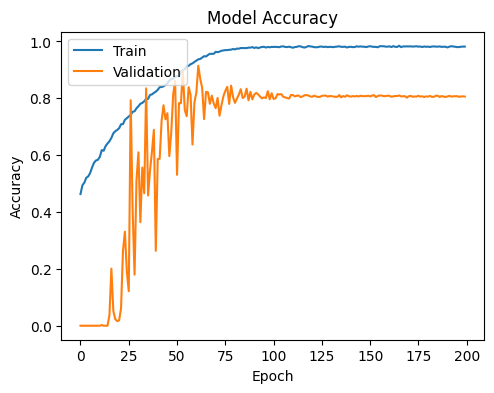

In [305]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [306]:
model.build()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_11 (RandomFlip  (None, 64, 64, 3)         0         
 )                                                               
                                                                 
 random_rotation_11 (Random  (None, 64, 64, 3)         0         
 Rotation)                                                       
                                                                 
 random_zoom_11 (RandomZoom  (None, 64, 64, 3)         0         
 )                                                               
                                                                 
 conv2d_208 (Conv2D)         (None, 64, 64, 64)        1792      
                                                                 
 conv2d_209 (Conv2D)         (None, 64, 64, 64)        36928     
                                                     

In [307]:
# Code showing the accmodel_loaded.evaluate(x_train, y_train)
model_loaded = tf.keras.models.load_model('best_model.tf')

In [308]:
model_loaded.evaluate(x_train, y_train)


469/469 [==============================] - 6s 13ms/step - loss: 0.1761 - accuracy: 0.9372


[0.17611552774906158, 0.9372000098228455]

In [309]:
model_loaded.predict(x_train)[10000]

469/469 [==============================] - 6s 12ms/step


array([0.0044066 , 0.05122435, 0.944369  ], dtype=float32)

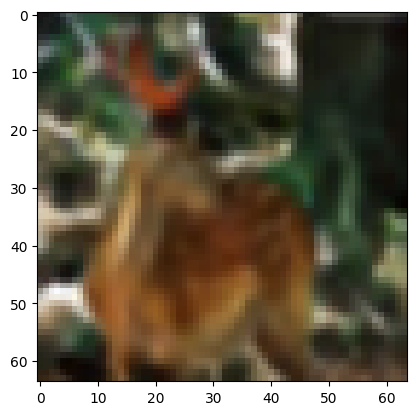

In [310]:
plt.imshow(x_train[10000])

In [311]:
y_train[10000]

2

# Object Detection

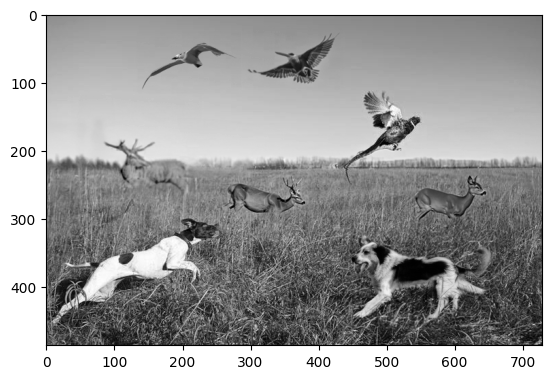

In [312]:
#load imaage as grey scale
img = cv2.imread('dog_bird_deer.jpg')

#convert bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#show image
plt.imshow(gray, cmap='gray')

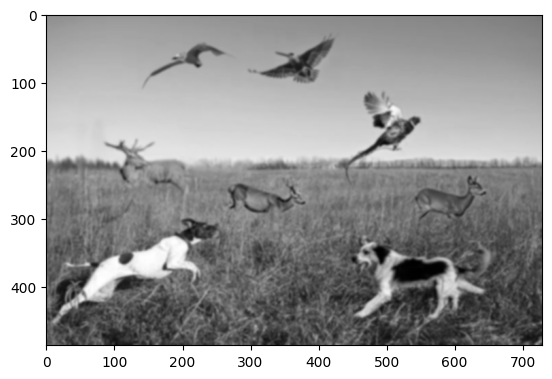

In [313]:
#apply gaussian blur
img_blur = cv2.GaussianBlur(gray, (7,7), 0)
#show image
plt.imshow(img_blur, cmap='gray')

1771.47


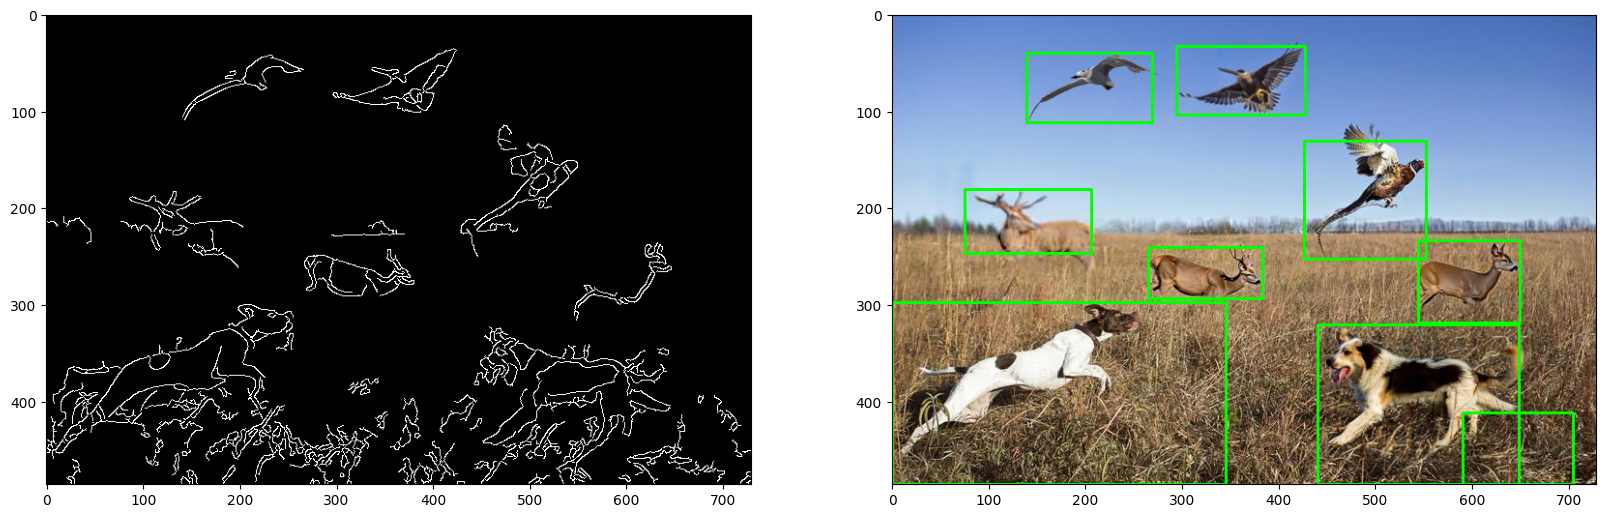

In [314]:
# Apply Canny edge detection
canny_edges = cv2.Canny(img_blur, 55, 200)

# Increase the kernel size for dilating the edges to close gaps in contours
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(canny_edges, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


min_area_threshold = 0.005 * img.shape[0] * img.shape[1]
print(min_area_threshold)

# Draw bounding boxes based on the area threshold
for c in contours:
    if cv2.contourArea(c) > min_area_threshold:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(canny_edges, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow( img)
plt.show()

# Classification of Detected Objects

1/1 [==============================] - 0s 13ms/step
Image 1: [0.04554017 0.10806549 0.84639436]
Image 2: [0.00104733 0.00511697 0.9938356 ]
Image 3: [0.00921362 0.8262026  0.16458382]
Image 4: [0.00289322 0.0089639  0.9881429 ]
Image 5: [0.04527266 0.04118848 0.9135389 ]
Image 6: [0.00357658 0.9544229  0.0420006 ]
Image 7: [0.00983065 0.13457958 0.8555898 ]
Image 8: [5.6457293e-04 2.5484009e-02 9.7395146e-01]
Image 9: [0.00181904 0.142156   0.856025  ]
[2 2 1 2 2 1 2 2 2]


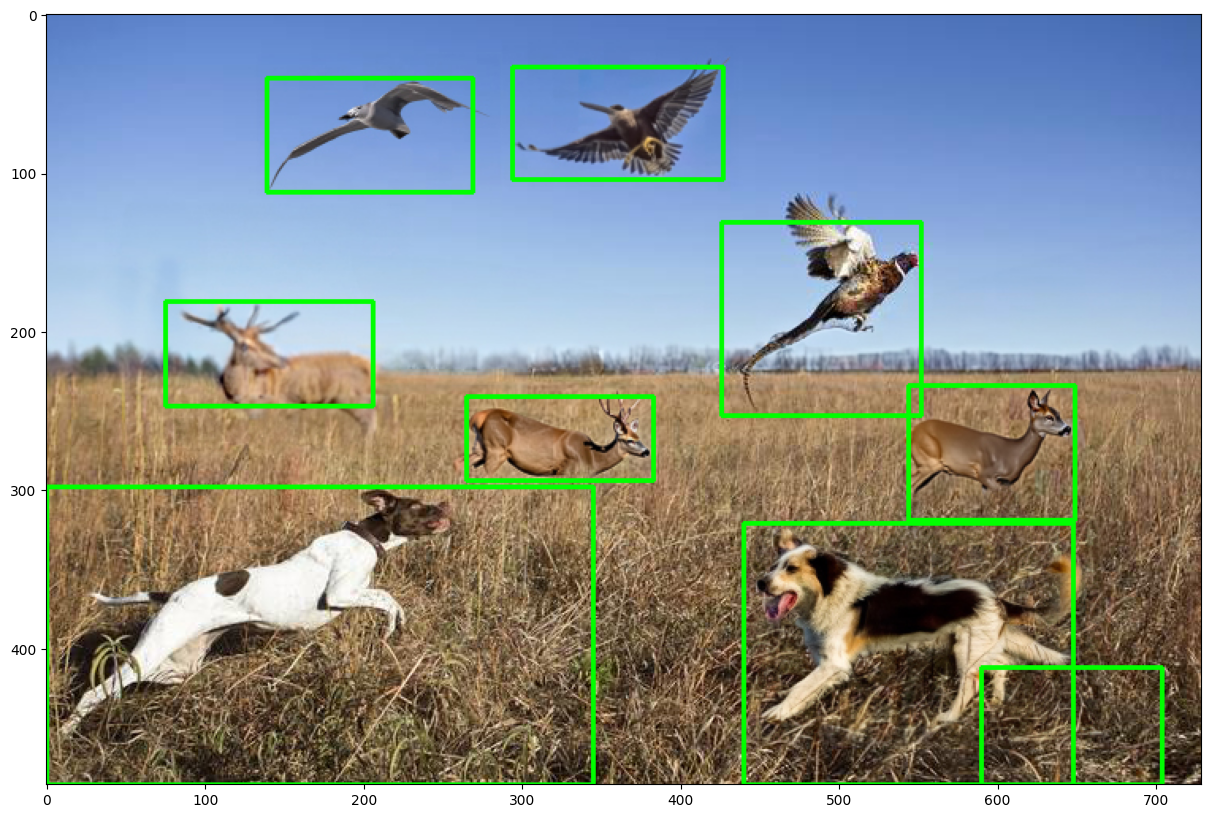

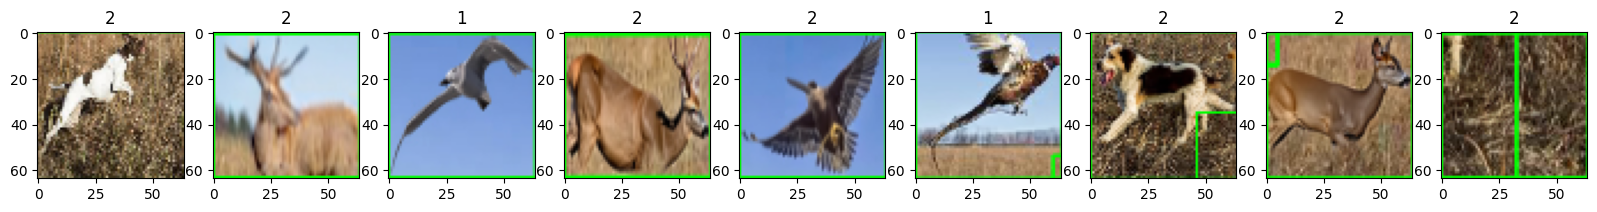

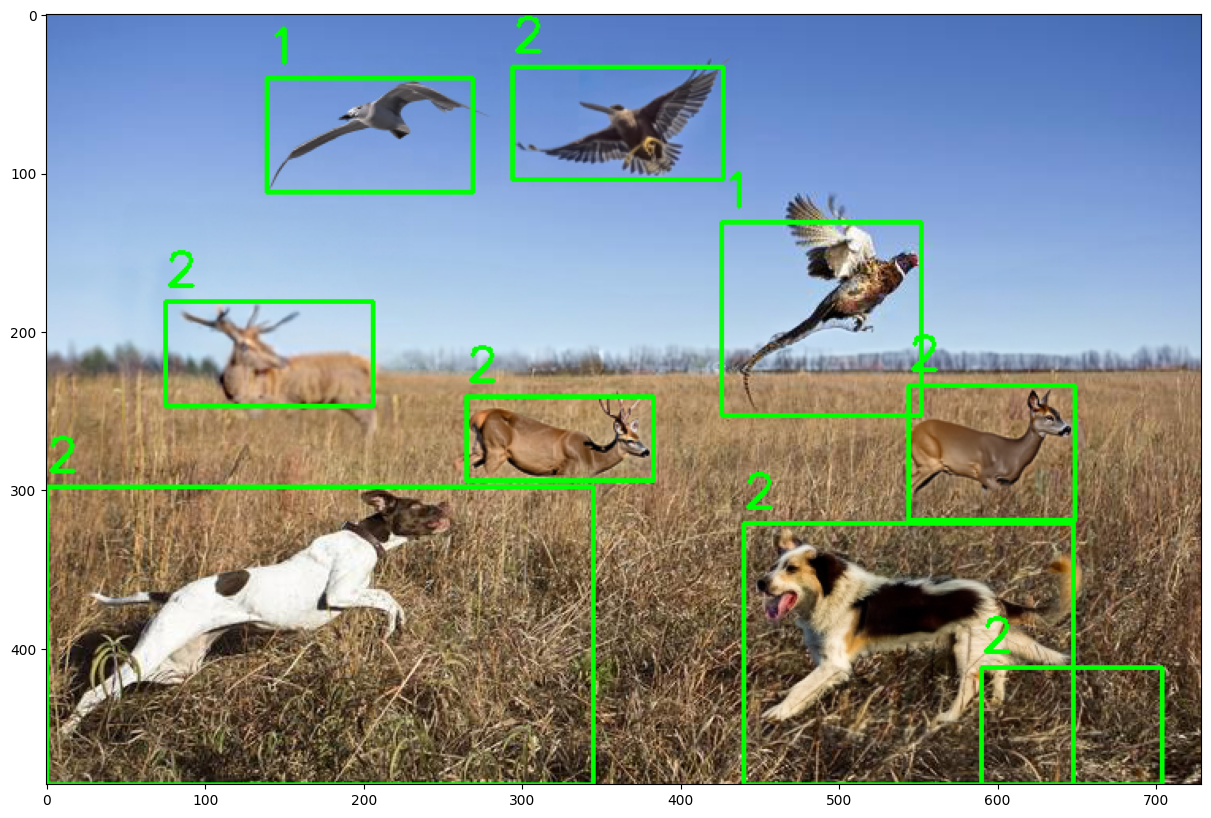

In [315]:
#make all the bounding boxes 64x64 so we can feed them into our model for prediction

#store the bounding boxes in a list
bounding_boxes = []

for c in contours:
    if cv2.contourArea(c) > min_area_threshold:
        x, y, w, h = cv2.boundingRect(c)
        bounding_boxes.append((x, y, w, h))
        
#sort the bounding boxes by their x coordinate
bounding_boxes.sort(key=lambda x: x[0])

#show the bounding boxes
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img)

#crop all the images inside the boxes as 64x64 images
cropped_images = []

for box in bounding_boxes:
    x, y, w, h = box
    cropped = img[y:y+h, x:x+w]
    cropped_images.append(cropped)
    
#show the cropped images
plt.figure(figsize=(20, 10))
for i in range(len(cropped_images)):
    plt.subplot(1, len(cropped_images), i + 1)
    plt.imshow(cropped_images[i])
    
#resize the images to 64x64
resized_images = []

for image in cropped_images:
    resized = cv2.resize(image, (64, 64))
    resized_images.append(resized)
    
#show the resized images
plt.figure(figsize=(20, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i + 1)
    plt.imshow(resized_images[i])
    
#convert the images to numpy arrays
resized_images = np.array(resized_images)

#normalize the images
resized_images = resized_images.astype('float32') / 255.0

#make predictions on the images
predictions = model_loaded.predict(resized_images)

#show the predictions
for i in range(len(predictions)):
    print(f"Image {i + 1}: {predictions[i]}")
    

# label the images
labels = np.argmax(predictions, axis=1)
print(labels)

#show the images with their labels
plt.figure(figsize=(20, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i + 1)
    plt.title(labels[i])
    plt.imshow(resized_images[i])
    

#show the labels on the original image with bounding boxes
for i in range(len(labels)):
    x, y, w, h = bounding_boxes[i]
    cv2.putText(img, str(labels[i]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()


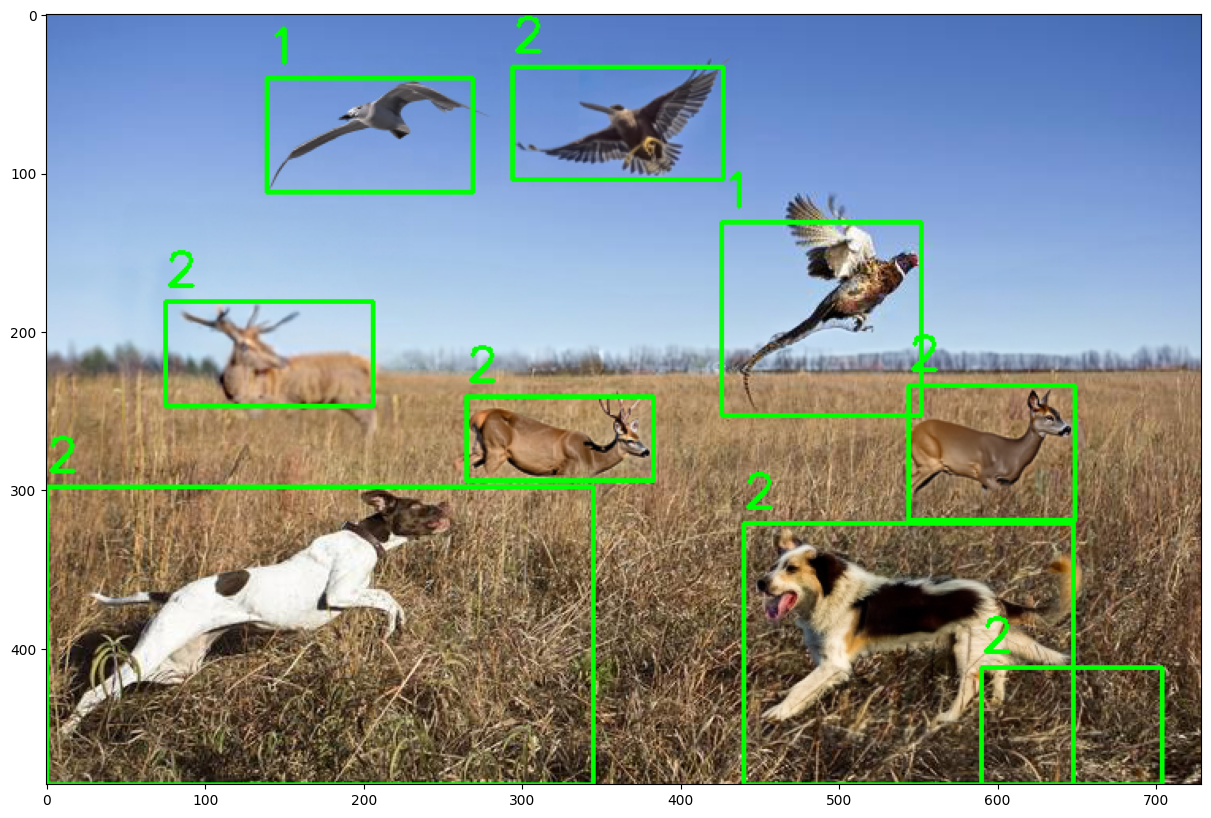

In [316]:
# Render a final image showing the result of your object detector with bounding boxes and labels on the original image.

# Text properties
text = "image label"
position = (50, 50)  # x, y coordinates
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255, 255, 255)  # White color in BGR
thickness = 2

# Put the text on the image
# cv2.putText(image, text, position, font, font_scale, color, thickness)

final_image = img.copy()

for i in range(len(labels)):
    x, y, w, h = bounding_boxes[i]
    cv2.putText(final_image, str(labels[i]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(final_image)
plt.show()

